In [ ]:
! pip install tabulate
! pip install psycopg2-binary
! pip install colorama 
! pip install pandas
! pip install matplotlib
! pip install numpy
! pip install dotenv
! pip install python-dotenv psycopg2-binary colorama

Import all of the Libraries needed to run this program

In [1]:
#Importing necessary libraries
import os
import json
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import tkinter as tk
from tkinter import messagebox
from typing import Optional
from tabulate import tabulate
from dotenv import load_dotenv
from colorama import init, Fore, Style
from psycopg2.extras import RealDictCursor

Connect to the DataBase

In [2]:
# Load environment variables from the .env file
load_dotenv()

# Connect to the database using the environment variables
def get_db_connection_from_env():
    #Create and return a database connection using the .env file.
    return psycopg2.connect(
        host=os.getenv('DB_HOST'),
        database=os.getenv('DB_NAME'),
        user=os.getenv('DB_USER'),
        password=os.getenv('DB_PASSWORD'),
        cursor_factory=RealDictCursor
    )

# Test the connection
try:
    conn = get_db_connection_from_env()
    print("Database connection successful!")
    conn.close()
except Exception as e:
    print(f"Error connecting to the database: {e}")

Database connection successful!


Displays the Main Database

In [3]:
# Collect the column names and rows from the database
def get_categories():
    conn = get_db_connection_from_env()
    try:
        with conn.cursor() as cur:
            cur.execute("SELECT * FROM company_bios;")
            columns = [desc[0] for desc in cur.description]  # Column names
            results = cur.fetchall()  # List of rows
            return columns, results  # Return both column names and rows
    finally:
        conn.close()

# Fetch the data
columns, categories = get_categories()

# Convert the database data into a DataFrame
df = pd.DataFrame(categories, columns=columns)

# Display the DataFrame
display(df)

,employee_id,first_name,last_name,technical_skills,soft_skills,certifications,languages,hire_date,end_date,updated_at,education,work_experience,level,division,uuid,home_city,home_country
0,1438,Chaz,Henry,"[Python, OpenAI, GenAI, Azure, React, CAD/CAM,...","[Innovation, Team Collaboration, Leadership, A...",[Certified Information Systems Security Profes...,[English],2021-10-20 13:55:09.197584,None,2025-01-28 13:55:09.197584,"[{'year': 2005, 'major': 'Entrepreneurship', '...","[{'title': 'R&D Manager', 'company': 'Airbnb',...",Senior Director,GenAI CoE,341e5a8c-586b-4c75-9d94-d448fa7ab50c,Raleigh,US
1,1001,Sofia,Carter-Smith,"[Change Management, Governance, Risk, and Comp...","[Innovation, Project Management, Emotional Int...","[Chartered Financial Analyst (CFA), Certified ...","[English, Turkish, Portuguese]",2021-04-26 13:38:42.491677,None,2025-01-28 13:38:42.491677,"[{'year': 1991, 'major': 'Anthropology', 'degr...","[{'title': 'Quality Assurance Manager', 'compa...",Senior Manager,A&Mplify,ae6f6c02-ff48-4a0c-a5cd-62610a9c867a,Tokyo,JP
2,1005,Clayton,Kershaw,"[JavaScript, Legal Operations, Web Development...","[Creativity, Research, Adaptability, Conflict ...",[Certified Internal Auditor (CIA)],[English],2009-01-06 13:39:16.929589,None,2025-01-28 13:39:16.929589,"[{'year': 1999, 'major': 'Electrical Engineeri...","[{'title': 'UX Researcher', 'company': 'IBM', ...",Managing Director,CPI,c2917f90-49e6-4fdb-b6a3-2a38311ee96a,Mumbai,IN
3,1002,Scarlett,Lee,"[Enterprise Application Integration, SQL, Web ...","[Analytical Thinking, Team Collaboration, Adap...",[],"[English, Polish, German]",2014-02-23 13:39:12.101207,None,2025-01-28 13:39:12.101207,"[{'year': 1997, 'major': 'Classical Studies', ...","[{'title': 'Full Stack Developer', 'company': ...",Partner,CRG,a9707a0b-a779-4ffb-b423-eb0c21795263,Madrid,ES
4,1012,Elizabeth,Rodriguez,"[Cloud Migration, Git, Java, Infrastructure as...","[Conflict Resolution, Critical Thinking, Publi...","[Six Sigma Black Belt, Certified Information S...",[English],2007-06-03 13:39:33.004922,None,2025-01-28 13:39:33.004922,"[{'year': 2013, 'major': 'Industrial Engineeri...","[{'title': 'Business Analyst', 'company': 'Met...",Consultant,A&Mplify,f032245b-19c2-4125-bdf4-f1ed859fd9fb,Los Angeles,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,Abigail,Garcia,"[Go, Performance Metrics, Networking, JavaScript]","[Flexibility, Creativity, Networking, Conflict...",[Certified Internal Auditor (CIA)],"[English, Japanese, Italian]",2020-12-16 13:57:34.367680,None,2025-01-28 13:57:34.367680,"[{'year': 2003, 'major': 'Interior Design', 'd...","[{'title': 'Project Manager', 'company': 'Orac...",Director,Energy,f2e4a580-370c-4880-a0da-fc7552ff8396,Sydney,AU
496,1497,Amelia,Roberts,"[Linux, Data Engineering, Vulnerability Assess...","[Cultural Awareness, Critical Thinking, Time M...","[Certified Management Accountant (CMA), Charte...",[English],2010-12-19 13:57:36.211062,None,2025-01-28 13:57:36.211062,"[{'year': 1993, 'major': 'Earth Science', 'deg...","[{'title': 'Supply Chain Manager', 'company': ...",Consultant,Energy,5c2784c9-f2fb-4c18-b654-54d89bf5d76b,Boston,US
497,1498,Harper,King,"[Trademark Law, Predictive Analytics, Mergers ...","[Analytical Thinking, Adaptability, Creativity...","[AWS Certified Solutions Architect, Certified ...","[English, Korean, German]",2011-11-11 13:57:37.604576,None,2025-01-28 13:57:37.604576,"[{'year': 2021, 'major': 'Dance', 'degree': 'B...","[{'title': 'Principal Engineer', 'company': 'C...",Manager,CRG,6f406601-4c11-49fa-bcf0-0ca06cb8a013,Los Angeles,US
498,1499,Luna,Rivera,"[Patent Law, Market Research, Data Warehousing...","[Flexibility, Time Management, Mentoring, Inno...",[Certified Information Systems Security Profes...,"[English, Korean, Turkish]",2014-07-01 13:57:41.187224,None,2025-01-28 13:57:41.187224,"[{'year': 2004, 'major': 'Photography', 'degre...","[{'title': 'Treasury Analyst', 'company': 'Ube...",Senior Associate,Valuation S

Connect and Swap the main database variable with the CSV database

In [4]:
# Specify the output file name
output_file = "Biodatabase.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(output_file)

# Replace the `categories` variable with the data from the CSV file
categories = df.to_dict(orient='records')

# Print confirmation
print("The database variable has been replaced with the data from the CSV file.")

# Display the DataFrame
display(output_file)

The database variable has been replaced with the data from the CSV file.


'Biodatabase.csv'

Merging Another Database with CompanyBio CSV

In [5]:
# Load the CompanyBio.csv file into a DataFrame
company_bio_df = pd.read_csv("CompanyBio.csv")

# Ensure both DataFrames have compatible columns before merging
if not set(df.columns).issubset(set(company_bio_df.columns)):
    raise ValueError("The columns in the DataFrames are not compatible for merging.")

# Merge the two DataFrames
merged_df = pd.concat([df, company_bio_df], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_output_file = "MergedDatabase.csv"
merged_df.to_csv(merged_output_file, index=False)

print(f"Data from both databases has been successfully merged and saved to {merged_output_file}")

Data from both databases has been successfully merged and saved to MergedDatabase.csv


Display the merge data

In [6]:
# Swap the merged DataFrame into the variable holding the dataset
df = merged_df

# Replace the `categories` variable with the data from the merged DataFrame
categories = df.to_dict(orient='records')

# Display the merged DataFrame
display(df)

,employee_id,first_name,last_name,technical_skills,soft_skills,certifications,languages,hire_date,end_date,updated_at,education,work_experience,level,division,uuid,home_city,home_country
0,1438,Chaz,Henry,"['Python', 'OpenAI', 'GenAI', 'Azure', 'React'...","['Innovation', 'Team Collaboration', 'Leadersh...",['Certified Information Systems Security Profe...,['English'],2021-10-20 13:55:09.197584,NaN,2025-01-28 13:55:09.197584,"[{'year': 2005, 'major': 'Entrepreneurship', '...","[{'title': 'R&D Manager', 'company': 'Airbnb',...",Senior Director,GenAI CoE,341e5a8c-586b-4c75-9d94-d448fa7ab50c,Raleigh,US
1,1001,Sofia,Carter-Smith,"['Change Management', 'Governance, Risk, and C...","['Innovation', 'Project Management', 'Emotiona...","['Chartered Financial Analyst (CFA)', 'Certifi...","['English', 'Turkish', 'Portuguese']",2021-04-26 13:38:42.491677,NaN,2025-01-28 13:38:42.491677,"[{'year': 1991, 'major': 'Anthropology', 'degr...","[{'title': 'Quality Assurance Manager', 'compa...",Senior Manager,A&Mplify,ae6f6c02-ff48-4a0c-a5cd-62610a9c867a,Tokyo,JP
2,1005,Clayton,Kershaw,"['JavaScript', 'Legal Operations', 'Web Develo...","['Creativity', 'Research', 'Adaptability', 'Co...",['Certified Internal Auditor (CIA)'],['English'],2009-01-06 13:39:16.929589,NaN,2025-01-28 13:39:16.929589,"[{'year': 1999, 'major': 'Electrical Engineeri...","[{'title': 'UX Researcher', 'company': 'IBM', ...",Managing Director,CPI,c2917f90-49e6-4fdb-b6a3-2a38311ee96a,Mumbai,IN
3,1002,Scarlett,Lee,"['Enterprise Application Integration', 'SQL', ...","['Analytical Thinking', 'Team Collaboration', ...",[],"['English', 'Polish', 'German']",2014-02-23 13:39:12.101207,NaN,2025-01-28 13:39:12.101207,"[{'year': 1997, 'major': 'Classical Studies', ...","[{'title': 'Full Stack Developer', 'company': ...",Partner,CRG,a9707a0b-a779-4ffb-b423-eb0c21795263,Madrid,ES
4,1012,Elizabeth,Rodriguez,"['Cloud Migration', 'Git', 'Java', 'Infrastruc...","['Conflict Resolution', 'Critical Thinking', '...","['Six Sigma Black Belt', 'Certified Informatio...",['English'],2007-06-03 13:39:33.004922,NaN,2025-01-28 13:39:33.004922,"[{'year': 2013, 'major': 'Industrial Engineeri...","[{'title': 'Business Analyst', 'company': 'Met...",Consultant,A&Mplify,f032245b-19c2-4125-bdf4-f1ed859fd9fb,Los Angeles,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1772,Justin,Moyer,"['Kubernetes', 'React', 'SQL', 'Docker']","['Adaptability', 'Creativity']",['Certified Information Systems Security Profe...,"['French', 'Japanese', 'German']",2021-09-08,NaN,2025-02-21 00:06:32.118753,"[{'year': 2005, 'major': 'Fast food restaurant...","[{'title': 'Early years teacher', 'company': '...",Mid,Marketing,bcdbfbca-2704-4bf4-a6c5-66c8beb6c453,Eugeneshire,GQ
996,1255,Richard,Wood,"['SQL', 'Java', 'AWS']","['Team Collaboration', 'Leadership']",[],"['English', 'Spanish']",2020-09-13,NaN,2025-01-12 16:21:20.517068,"[{'year': 2002, 'major': 'Economist', 'degree'...","[{'title': 'Research officer, trade union', 'c...",Senior,HR,5e9cc880-06d2-4fa0-bf87-4eda0e17dbe2,Matthewmouth,PE
997,1247,Kimberly,Grimes,"['Python', 'React', 'Java', 'AWS', 'Docker']","['Critical Thinking', 'Leadership', 'Creativity']",[],"['English', 'Mandarin']",2025-03-25,NaN,2025-01-12 23:51:02.549272,"[{'year': 1994, 'major': 'Bookseller', 'degree...","[{'title': 'Chief Strategy Officer', 'company'...",Senior,HR,5943c4e2-7d9e-4eb6-af42-e12891f1b08a,New John,WS
998,1338,Darren,Cochran,"['Java', 'React']","['Adaptability', 'Critical Thinking', 'Team Co...",[],"['Spanish', 'Mandarin', 'German']",2020-12-05,NaN,2025-03-01 19:46:52.028001,"[{'year': 2020, 'major': 'Personal assistant',...","[{'title': 'Heritage manager', 'company': 'Kin...",Mid,Operations,83f1d5fc-c781-4d5c-af57-1fb8485c2fc2,Christopherstad,HU


Cleaning data

In [9]:
# Define the cleaned output file name
cleaned_output_file = "cleaned_Biodatabase.csv"

# Convert string representations of lists into actual lists and explode the specified columns
columns_to_explode = ['technical_skills', 'soft_skills', 'certifications', 'languages', 'education', 'work_experience']

for column in columns_to_explode:
    if column in df.columns:
        # Convert string to list
        df[column] = df[column].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else x)
        # Explode the column
        df = df.explode(column)

# Save the cleaned DataFrame to a new CSV file
df.to_csv(cleaned_output_file, index=False)

print(f"CSV file has been cleaned and saved as {cleaned_output_file}")

# Swap the cleaned CSV file with the variable holding the original CSV file
output_file = cleaned_output_file

# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Save the cleaned DataFrame back to the CSV file
df.to_csv(output_file, index=False)

print("Duplicate rows have been removed from the cleaned CSV file.")

# Update the output_file variable to point to the cleaned CSV file
output_file = cleaned_output_file

# Reload the DataFrame from the cleaned CSV file
df = pd.read_csv(output_file)

# Replace the `categories` variable with the data from the cleaned CSV file
categories = df.to_dict(orient='records')

# Print confirmation
print(f"The variables have been updated to use the cleaned CSV file: {output_file}")

CSV file has been cleaned and saved as cleaned_Biodatabase.csv
Duplicate rows have been removed from the cleaned CSV file.
The variables have been updated to use the cleaned CSV file: cleaned_Biodatabase.csv


Filter Criteria Module

In [10]:
def submit_selection_with_dropdown():

    selected_columns = [item for var, item in zip(checkbox_vars, item_names) if var.get()]
    if selected_columns:
        # Create a DataFrame from the database data
        df = pd.DataFrame(categories, columns=columns)
        
        # Create a new window for dropdown menus
        dropdown_window = tk.Toplevel(root)
        dropdown_window.title("Filter Data")
        
        # Store dropdown variables
        dropdown_vars = {}
        
        # Create dropdown menus for each selected column
        for col in selected_columns:
            label = tk.Label(dropdown_window, text=f"Select {col}:")
            label.pack()
            
            unique_values = df[col].dropna().unique()  # Get unique values for the column
            dropdown_var = tk.StringVar(dropdown_window)
            dropdown_var.set("Select")  # Default value
            dropdown_menu = tk.OptionMenu(dropdown_window, dropdown_var, *unique_values)
            dropdown_menu.pack()
            
            dropdown_vars[col] = dropdown_var
        
        def filter_data():
            #Filters the data based on dropdown selections and displays the result.
            filtered_df = df.copy()
            for col, var in dropdown_vars.items():
                selected_value = var.get()
                if selected_value != "Select":
                    filtered_df = filtered_df[filtered_df[col] == selected_value]
            
            # Display the filtered data
            if not filtered_df.empty:
                print(tabulate(filtered_df, headers='keys', tablefmt='psql'))
            else:
                messagebox.showinfo("No Results", "No matching data found.")
        
        # Submit button for filtering
        filter_btn = tk.Button(dropdown_window, text="Filter", command=filter_data)
        filter_btn.pack(pady=10)

        # Add a button to stop the loop and close the application
        stop_btn = tk.Button(root, text="Stop", command=root.destroy)
        stop_btn.pack(pady=10)

    else:
        messagebox.showinfo("No Selection", "No columns selected.")

# GUI
root = tk.Tk()
root.title("Checkbox Menu")
root.geometry("300x400")

# Store checkbox variables and names
checkbox_vars = []
item_names = []

# Add checkboxes dynamically
for item_id, name in enumerate(columns):
    var = tk.BooleanVar()
    checkbox = tk.Checkbutton(root, text=name, variable=var)
    checkbox.pack(anchor='w')
    checkbox_vars.append(var)
    item_names.append(name)

# Submit button
submit_btn = tk.Button(root, text="Submit", command=submit_selection_with_dropdown)
submit_btn.pack(pady=10)

# Run the GUI
root.mainloop()

+--------+---------------+--------------+-------------+--------------------+-----------------+----------------------------------------------+-------------+----------------------------+------------+----------------------------+-------------+-------------------+----------------+------------+--------------------------------------+-------------+----------------+
|        |   employee_id | first_name   | last_name   | technical_skills   | soft_skills     | certifications                               | languages   | hire_date                  |   end_date | updated_at                 | education   | work_experience   | level          | division   | uuid                                 | home_city   | home_country   |
|--------+---------------+--------------+-------------+--------------------+-----------------+----------------------------------------------+-------------+----------------------------+------------+----------------------------+-------------+-------------------+----------------+-

Ploting Data from the database

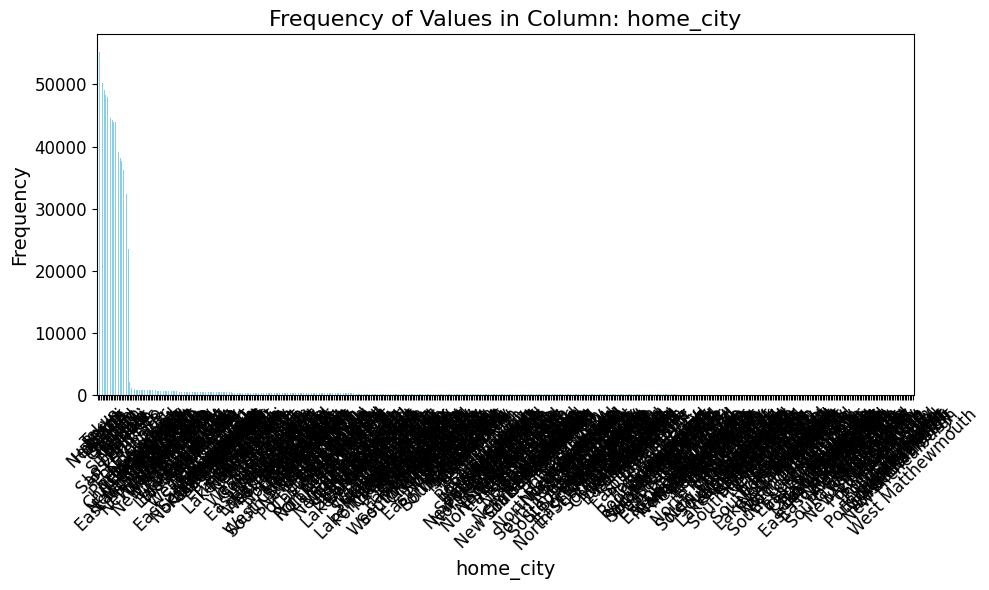

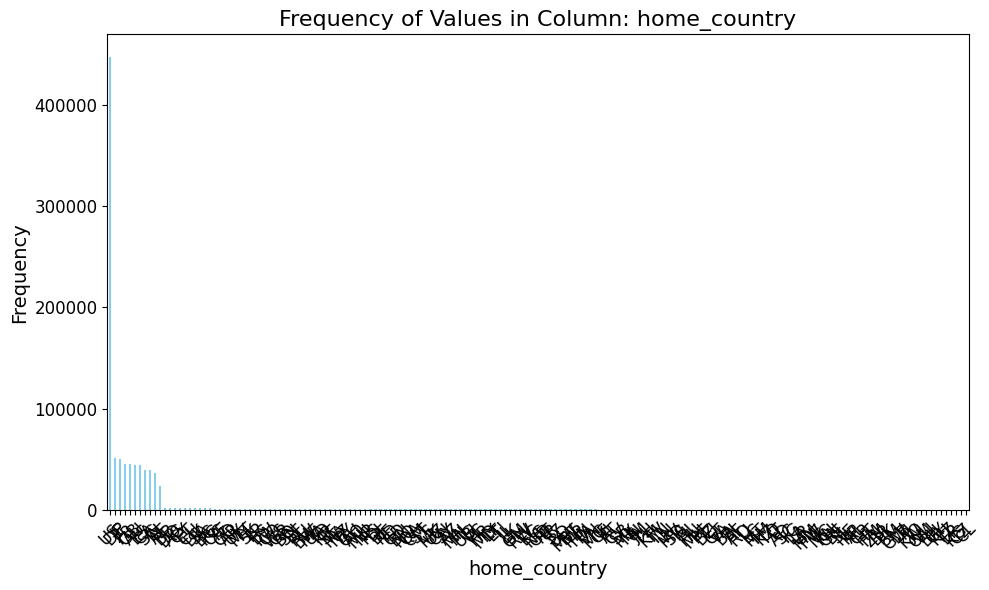

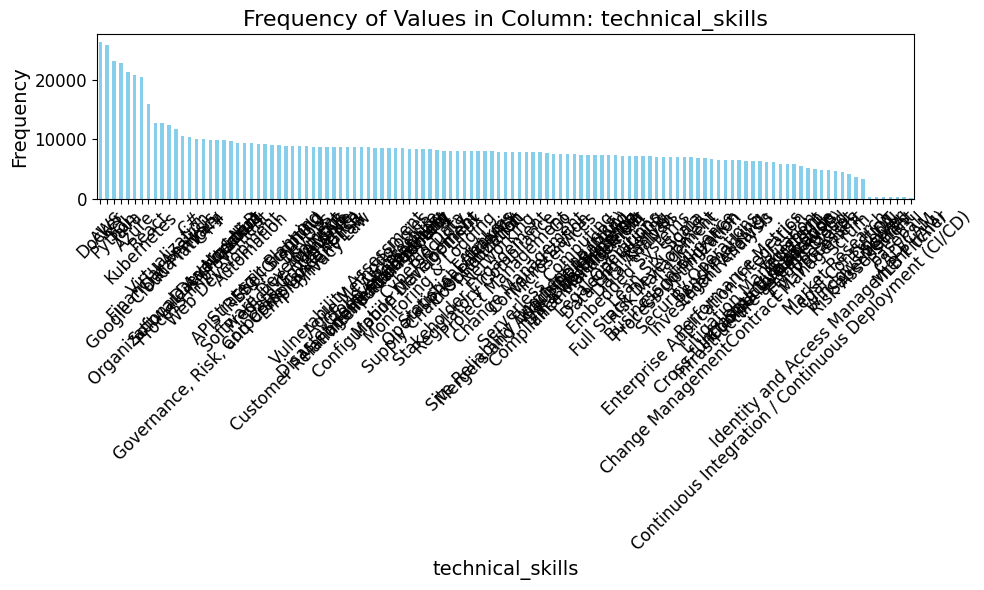

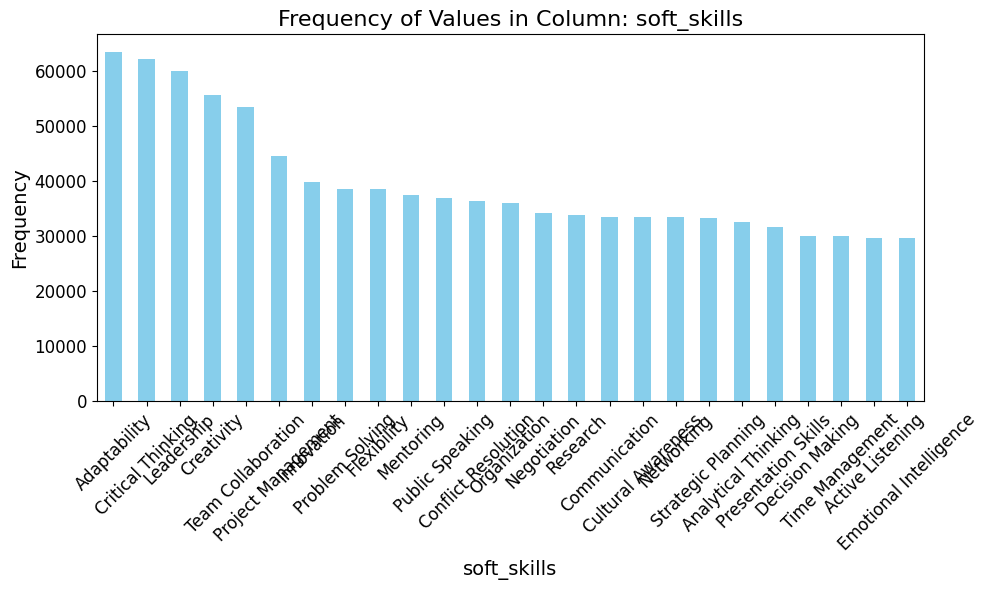

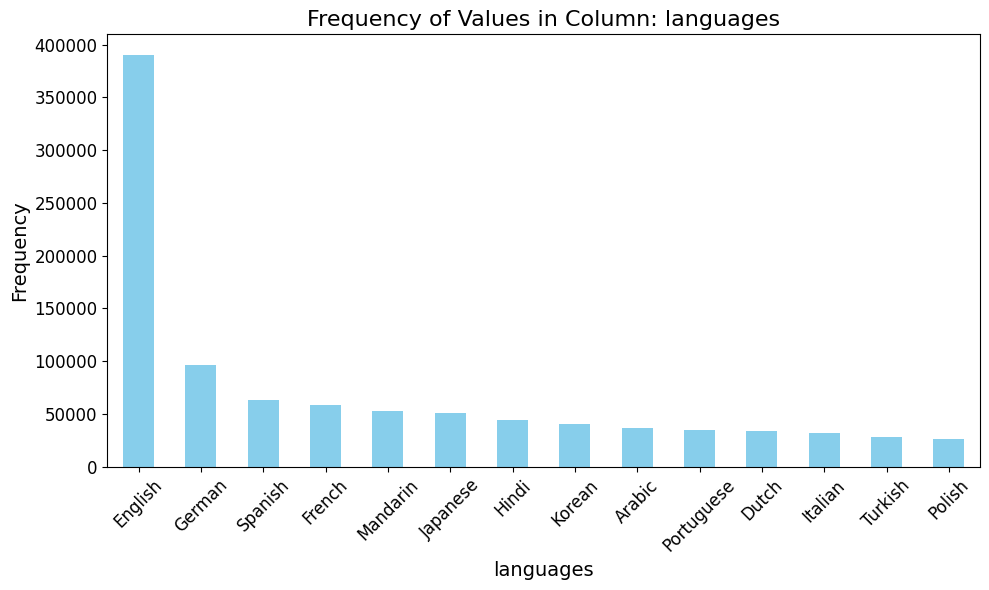

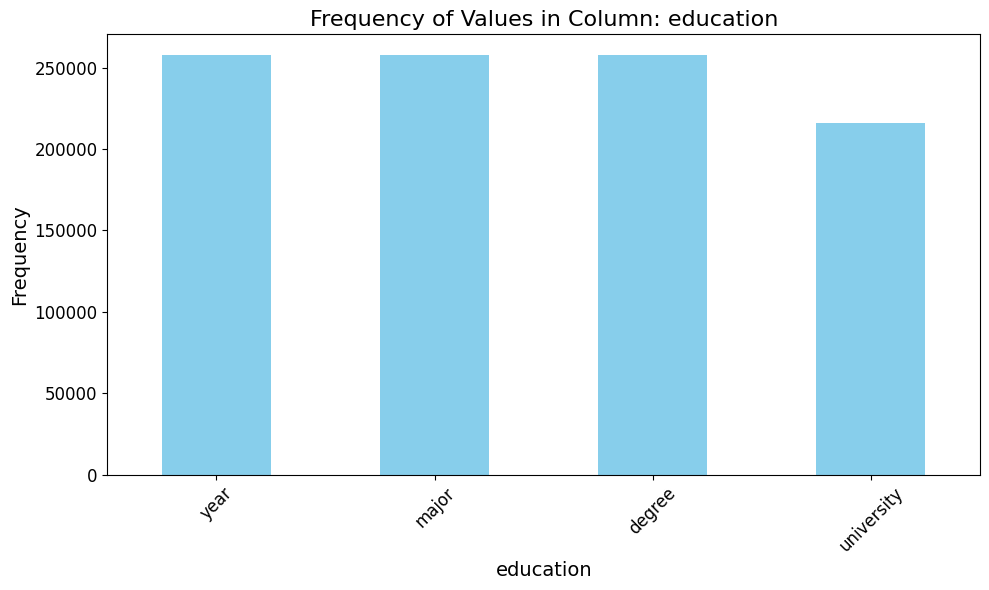

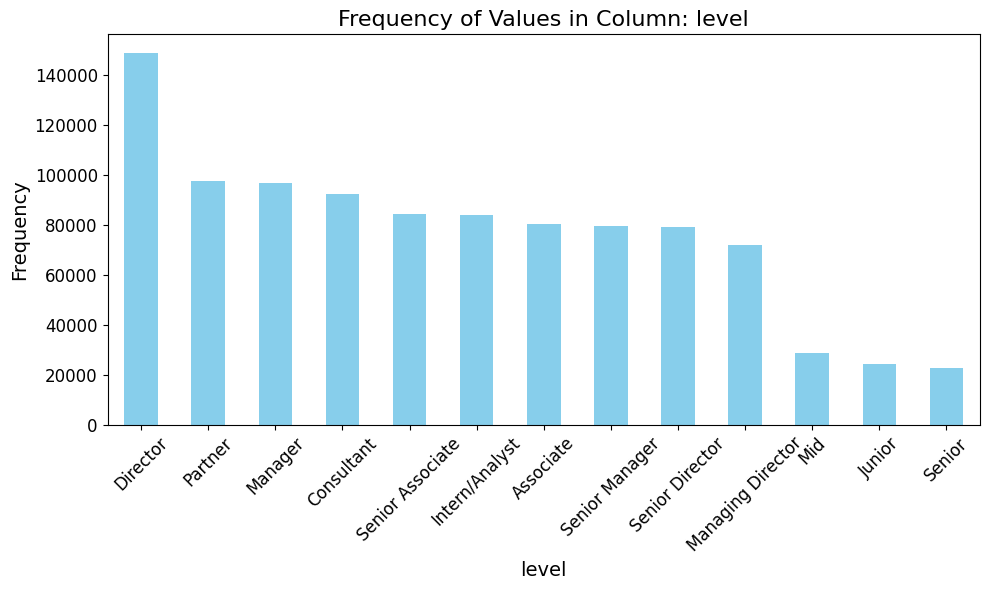

In [11]:
def submit_selection_for_frequency():
    #Handles checkbox selection and plots the frequency of selected column values.
    selected_columns = [item for var, item in zip(checkbox_vars, item_names) if var.get()]
    if len(selected_columns) == 1:  # Ensure only one column is selected
        selected_column = selected_columns[0]
        
        # Create a DataFrame from the database data
        df = pd.DataFrame(categories, columns=columns)
        
        # Calculate the frequency of values in the selected column
        frequency = df[selected_column].value_counts()
        
        # Plot the frequency as a bar chart
        plt.figure(figsize=(10, 6))
        frequency.plot(kind='bar', color='skyblue')
        plt.title(f"Frequency of Values in Column: {selected_column}", fontsize=16)
        plt.xlabel(selected_column, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()
    elif len(selected_columns) > 1:
        messagebox.showinfo("Multiple Selection", "Please select only one column.")
    else:
        messagebox.showinfo("No Selection", "No column selected.")

# GUI
root = tk.Tk()
root.title("Frequency Analysis")
root.geometry("300x400")

# Store checkbox variables and names
checkbox_vars = []
item_names = []

# Add checkboxes dynamically
for item_id, name in enumerate(columns):
    var = tk.BooleanVar()
    checkbox = tk.Checkbutton(root, text=name, variable=var)
    checkbox.pack(anchor='w')
    checkbox_vars.append(var)
    item_names.append(name)

# Submit button
submit_btn = tk.Button(root, text="Submit", command=submit_selection_for_frequency)
submit_btn.pack(pady=10)

# Add a button to stop the loop and close the application
stop_btn = tk.Button(root, text="Stop", command=root.destroy)
stop_btn.pack(pady=10)

# Run the GUI
root.mainloop()